# Table of Contents

### 1. Importing Visualisations Libraries and Data

### 2. Questions

### 3. Exploring Relationships - 
   Correlation Heatmap
   Scatterplot
   Pair Plot
   Categorical Plots 

### 4. Further Questions & Hypotheses

## 1. Importing Visualisations Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = r'/Users/ianfleming/Desktop/World Happiness Report Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','world_happiness_report.csv'),index_col = False)

In [4]:
# Check import

df.head()

Unnamed: 0 country_name regional_indicator  year  life_ladder  \
0           0  Afghanistan         South Asia  2008     3.723590   
1           1  Afghanistan         South Asia  2009     4.401778   
2           2  Afghanistan         South Asia  2010     4.758381   
3           3  Afghanistan         South Asia  2011     3.831719   
4           4  Afghanistan         South Asia  2012     3.782938   

   log_gdp_per_capita  social_support  healthy_life_expectancy_at_birth  \
0            7.350416        0.450662                         50.500000   
1            7.508646        0.552308                         50.799999   
2            7.613900        0.539075                         51.099998   
3            7.581259        0.521104                         51.400002   
4            7.660506        0.520637                         51.700001   

   freedom_to_make_life_choices  generosity  perceptions_of_corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   positive_affect  negative_affect  confidence_in_national_government  \
0         0.414297         0.258195                           0.612072   
1         0.481421         0.237092                           0.611545   
2         0.516907         0.275324                           0.299357   
3         0.479835         0.267175                           0.307386   
4         0.613513         0.267919                           0.435440   

   conf_gov_missing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [5]:
df.shape

(2199, 15)

In [6]:
# Drop unnamed column

df = df.drop(columns=["Unnamed: 0"])

In [7]:
df.shape

(2199, 14)

In [8]:
df.head()

country_name regional_indicator  year  life_ladder  log_gdp_per_capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   social_support  healthy_life_expectancy_at_birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   freedom_to_make_life_choices  generosity  perceptions_of_corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   positive_affect  negative_affect  confidence_in_national_government  \
0         0.414297         0.258195                           0.612072   
1         0.481421         0.237092                           0.611545   
2         0.516907         0.275324                           0.299357   
3         0.479835         0.267175                           0.307386   
4         0.613513         0.267919                           0.435440   

   conf_gov_missing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_name                       2199 non-null   object 
 1   regional_indicator                 2199 non-null   object 
 2   year                               2199 non-null   int64  
 3   life_ladder                        2199 non-null   float64
 4   log_gdp_per_capita                 2199 non-null   float64
 5   social_support                     2199 non-null   float64
 6   healthy_life_expectancy_at_birth   2199 non-null   float64
 7   freedom_to_make_life_choices       2199 non-null   float64
 8   generosity                         2199 non-null   float64
 9   perceptions_of_corruption          2199 non-null   float64
 10  positive_affect                    2199 non-null   float64
 11  negative_affect                    2199 non-null   float

In [10]:
df.describe()

year  life_ladder  log_gdp_per_capita  social_support  \
count  2199.000000  2199.000000         2199.000000     2199.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.148128        0.120594   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.505131        0.747512   
50%    2014.000000     5.432437            9.491772        0.834280   
75%    2018.000000     6.309460           10.366237        0.904607   
max    2022.000000     8.018934           11.663788        0.987343   

       healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
count                       2199.000000                   2199.000000   
mean                          63.294583                      0.747858   
std                            6.815805                      0.139094   
min                            6.720000                      0.257534   
25%                           59.412500                      0.658615   
50%                           64.879997                      0.766945   
75%                           68.329998                      0.857775   
max                           74.474998                      0.985178   

        generosity  perceptions_of_corruption  positive_affect  \
count  2199.000000                2199.000000      2199.000000   
mean      0.000096                   0.745195         0.652143   
std       0.158385                   0.180867         0.105342   
min      -0.337527                   0.035198         0.178886   
25%      -0.107358                   0.697610         0.572742   
50%      -0.016512                   0.791269         0.661645   
75%       0.086938                   0.865565         0.736762   
max       0.702708                   0.983276         0.883586   

       negative_affect  confidence_in_national_government  conf_gov_missing  
count      2199.000000                        1838.000000       2199.000000  
mean          0.271501                           0.483999          0.164166  
std           0.086559                           0.193071          0.370510  
min           0.082737                           0.068769          0.000000  
25%           0.208157                           0.332549          0.000000  
50%           0.261508                           0.467140          0.000000  
75%           0.322382                           0.618846          0.000000  
max           0.704590                           0.993604          1.000000

## 2. Questions

Questions to Explore

- How has global happiness (life ladder score) changed from 2005 to 2022?
- Are some regions improving while others decline?
- Which regions consistently report higher or lower happiness scores?
- How does Ireland compare to the global average?
- Which variables (e.g., GDP, social support, life expectancy, freedom, generosity, corruption) are most strongly correlated with happiness?
- Is there a relationship between confidence in national government and happiness?
- Does the “missingness” in this variable correspond to certain regions or country types?


## 3. Exploring Relationships

In [11]:
# Drop columns for correlation analysis
eda_vars = df.drop(columns=[
    "country_name",
    "regional_indicator",
    "year",
    "conf_gov_missing"
])

In [12]:
# Check column drop
eda_vars.head()

life_ladder  log_gdp_per_capita  social_support  \
0     3.723590            7.350416        0.450662   
1     4.401778            7.508646        0.552308   
2     4.758381            7.613900        0.539075   
3     3.831719            7.581259        0.521104   
4     3.782938            7.660506        0.520637   

   healthy_life_expectancy_at_birth  freedom_to_make_life_choices  generosity  \
0                         50.500000                      0.718114    0.167652   
1                         50.799999                      0.678896    0.190809   
2                         51.099998                      0.600127    0.121316   
3                         51.400002                      0.495901    0.163571   
4                         51.700001                      0.530935    0.237588   

   perceptions_of_corruption  positive_affect  negative_affect  \
0                   0.881686         0.414297         0.258195   
1                   0.850035         0.481421         0.237092   
2                   0.706766         0.516907         0.275324   
3                   0.731109         0.479835         0.267175   
4                   0.775620         0.613513         0.267919   

   confidence_in_national_government  
0                           0.612072  
1                           0.611545  
2                           0.299357  
3                           0.307386  
4                           0.435440

Create a correlation matrix heatmap

In [13]:
# Create correlation matrix
corr = eda_vars.corr()

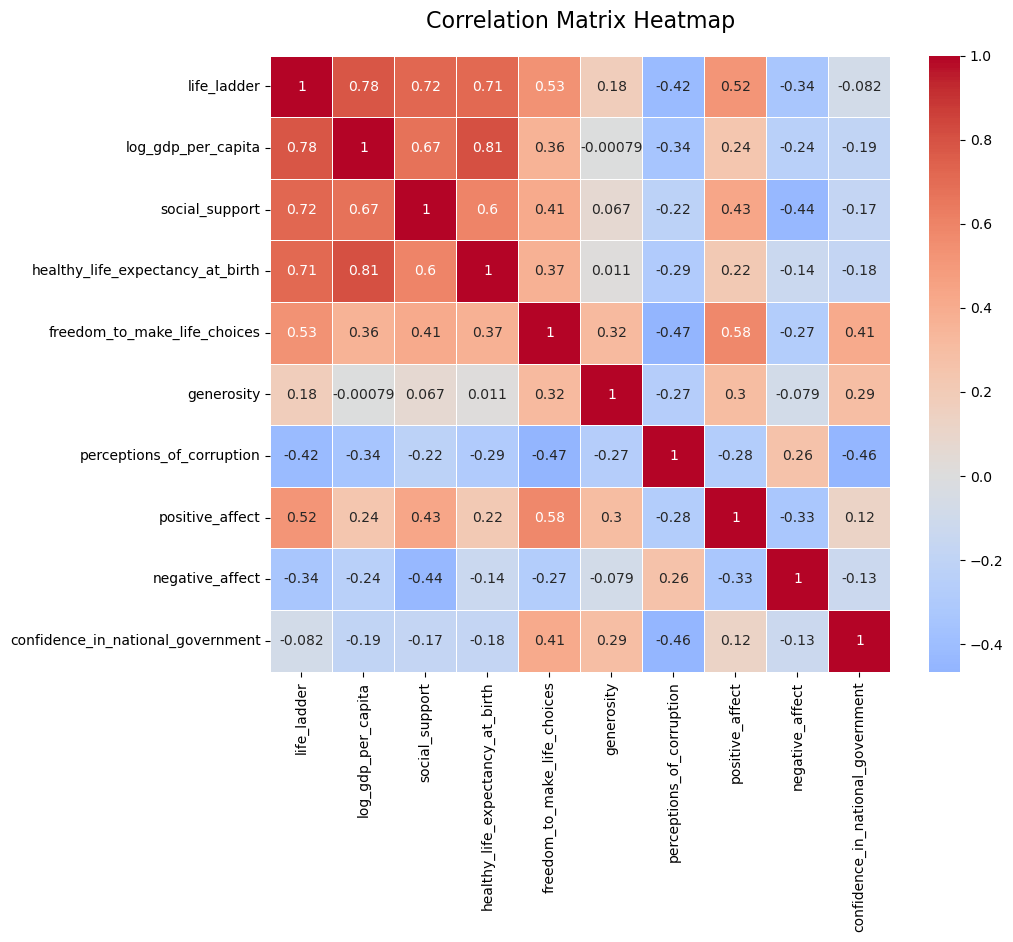

In [14]:
# Plot heatmap
corr_heat = plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=20)
plt.show()

The heatmap shows the correlation coefficients between the numeric variables.  
- Values close to +1 indicate a strong positive relationship (e.g., as GDP increases, happiness tends to increase).  
- Values close to –1 indicate a strong negative relationship (e.g., higher corruption might be linked with lower happiness).  
- Values near 0 suggest a weak or no linear relationship.  

In [15]:
# Export visual
corr_heat.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'heatmap_happiness.png'))

Create a scatterplot

In [16]:
# Create a subset of strongest correlations with life_ladder
strong_corr_vars = [
    "log_gdp_per_capita",
    "social_support",
    "healthy_life_expectancy_at_birth",
    "freedom_to_make_life_choices",
    "perceptions_of_corruption"
]

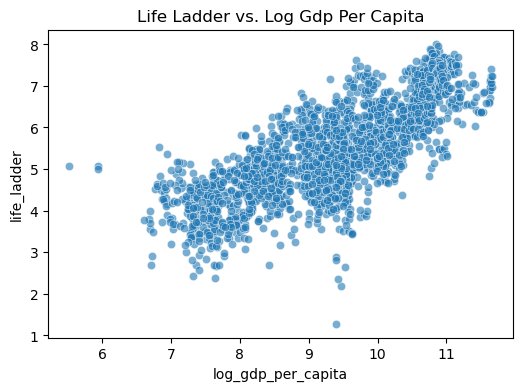

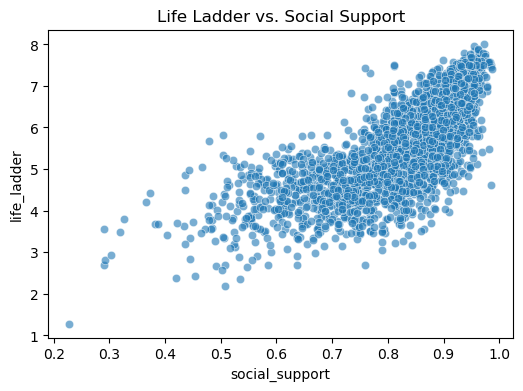

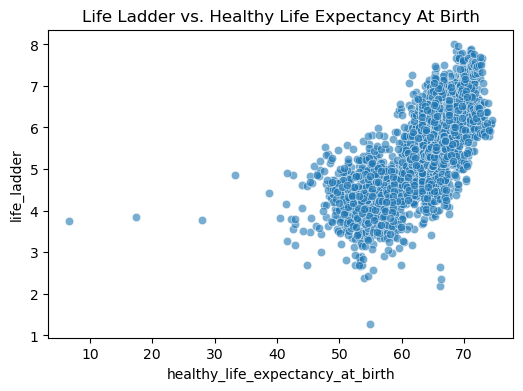

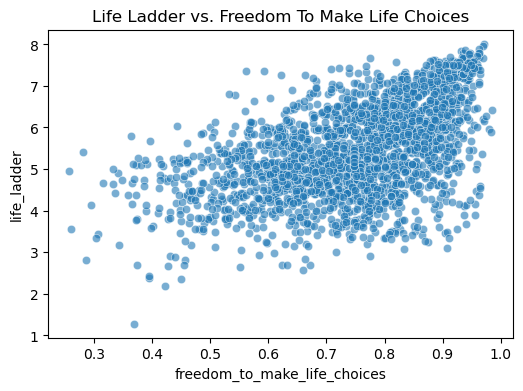

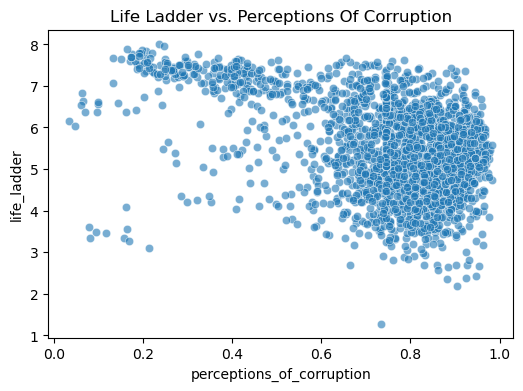

In [17]:
# Create a scatterplot
for var in strong_corr_vars:
    life_ladder_scatterplot = plt.figure(figsize=(6,4))
    sns.scatterplot(x=var, y="life_ladder", data=eda_vars, alpha=0.6)
    plt.title(f"Life Ladder vs. {var.replace('_',' ').title()}")
    plt.show()
    

The scatterplots show the relationships between 'life_ladder' (happiness) and the main variables that were most correlated in the heatmap:

- GDP per capita:  
  There is a clear positive linear relationship. Countries with higher GDP per capita generally report higher happiness scores, although the relationship flattens slightly at very high income levels.

- Social support:  
  A very strong positive relationship. Countries with higher reported social support have consistently higher happiness scores. This appears to be one of the strongest predictors in the dataset.

- Healthy life expectancy at birth: 
  Strong positive relationship. Countries where people live longer, healthier lives tend to report higher well-being. Some outliers with low life expectancy and low happiness are visible.

- Freedom to make life choices:  
  A moderately strong positive trend. Countries where people feel more freedom to make life decisions tend to be happier.

- Perceptions of corruption:  
  A negative relationship. Higher perceived corruption is associated with lower happiness, although the points are more scattered compared to GDP and social support. The relationship is weaker but still visible.

Conclusion:  
The scatterplots confirm that economic prosperity, strong social ties, good health, and freedom are all strongly linked with higher happiness, while corruption undermines it. These findings align with expectations from prior research on well-being.


In [18]:
# export scatterplots
life_ladder_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'happiness_scatterplot.png'))

Pair Plot of Entire Dataset (numeric only)

In [19]:
# Select numeric columns only (drops country_name and regional_indicator)
numeric_df = df.select_dtypes(include=['float64','int64'])

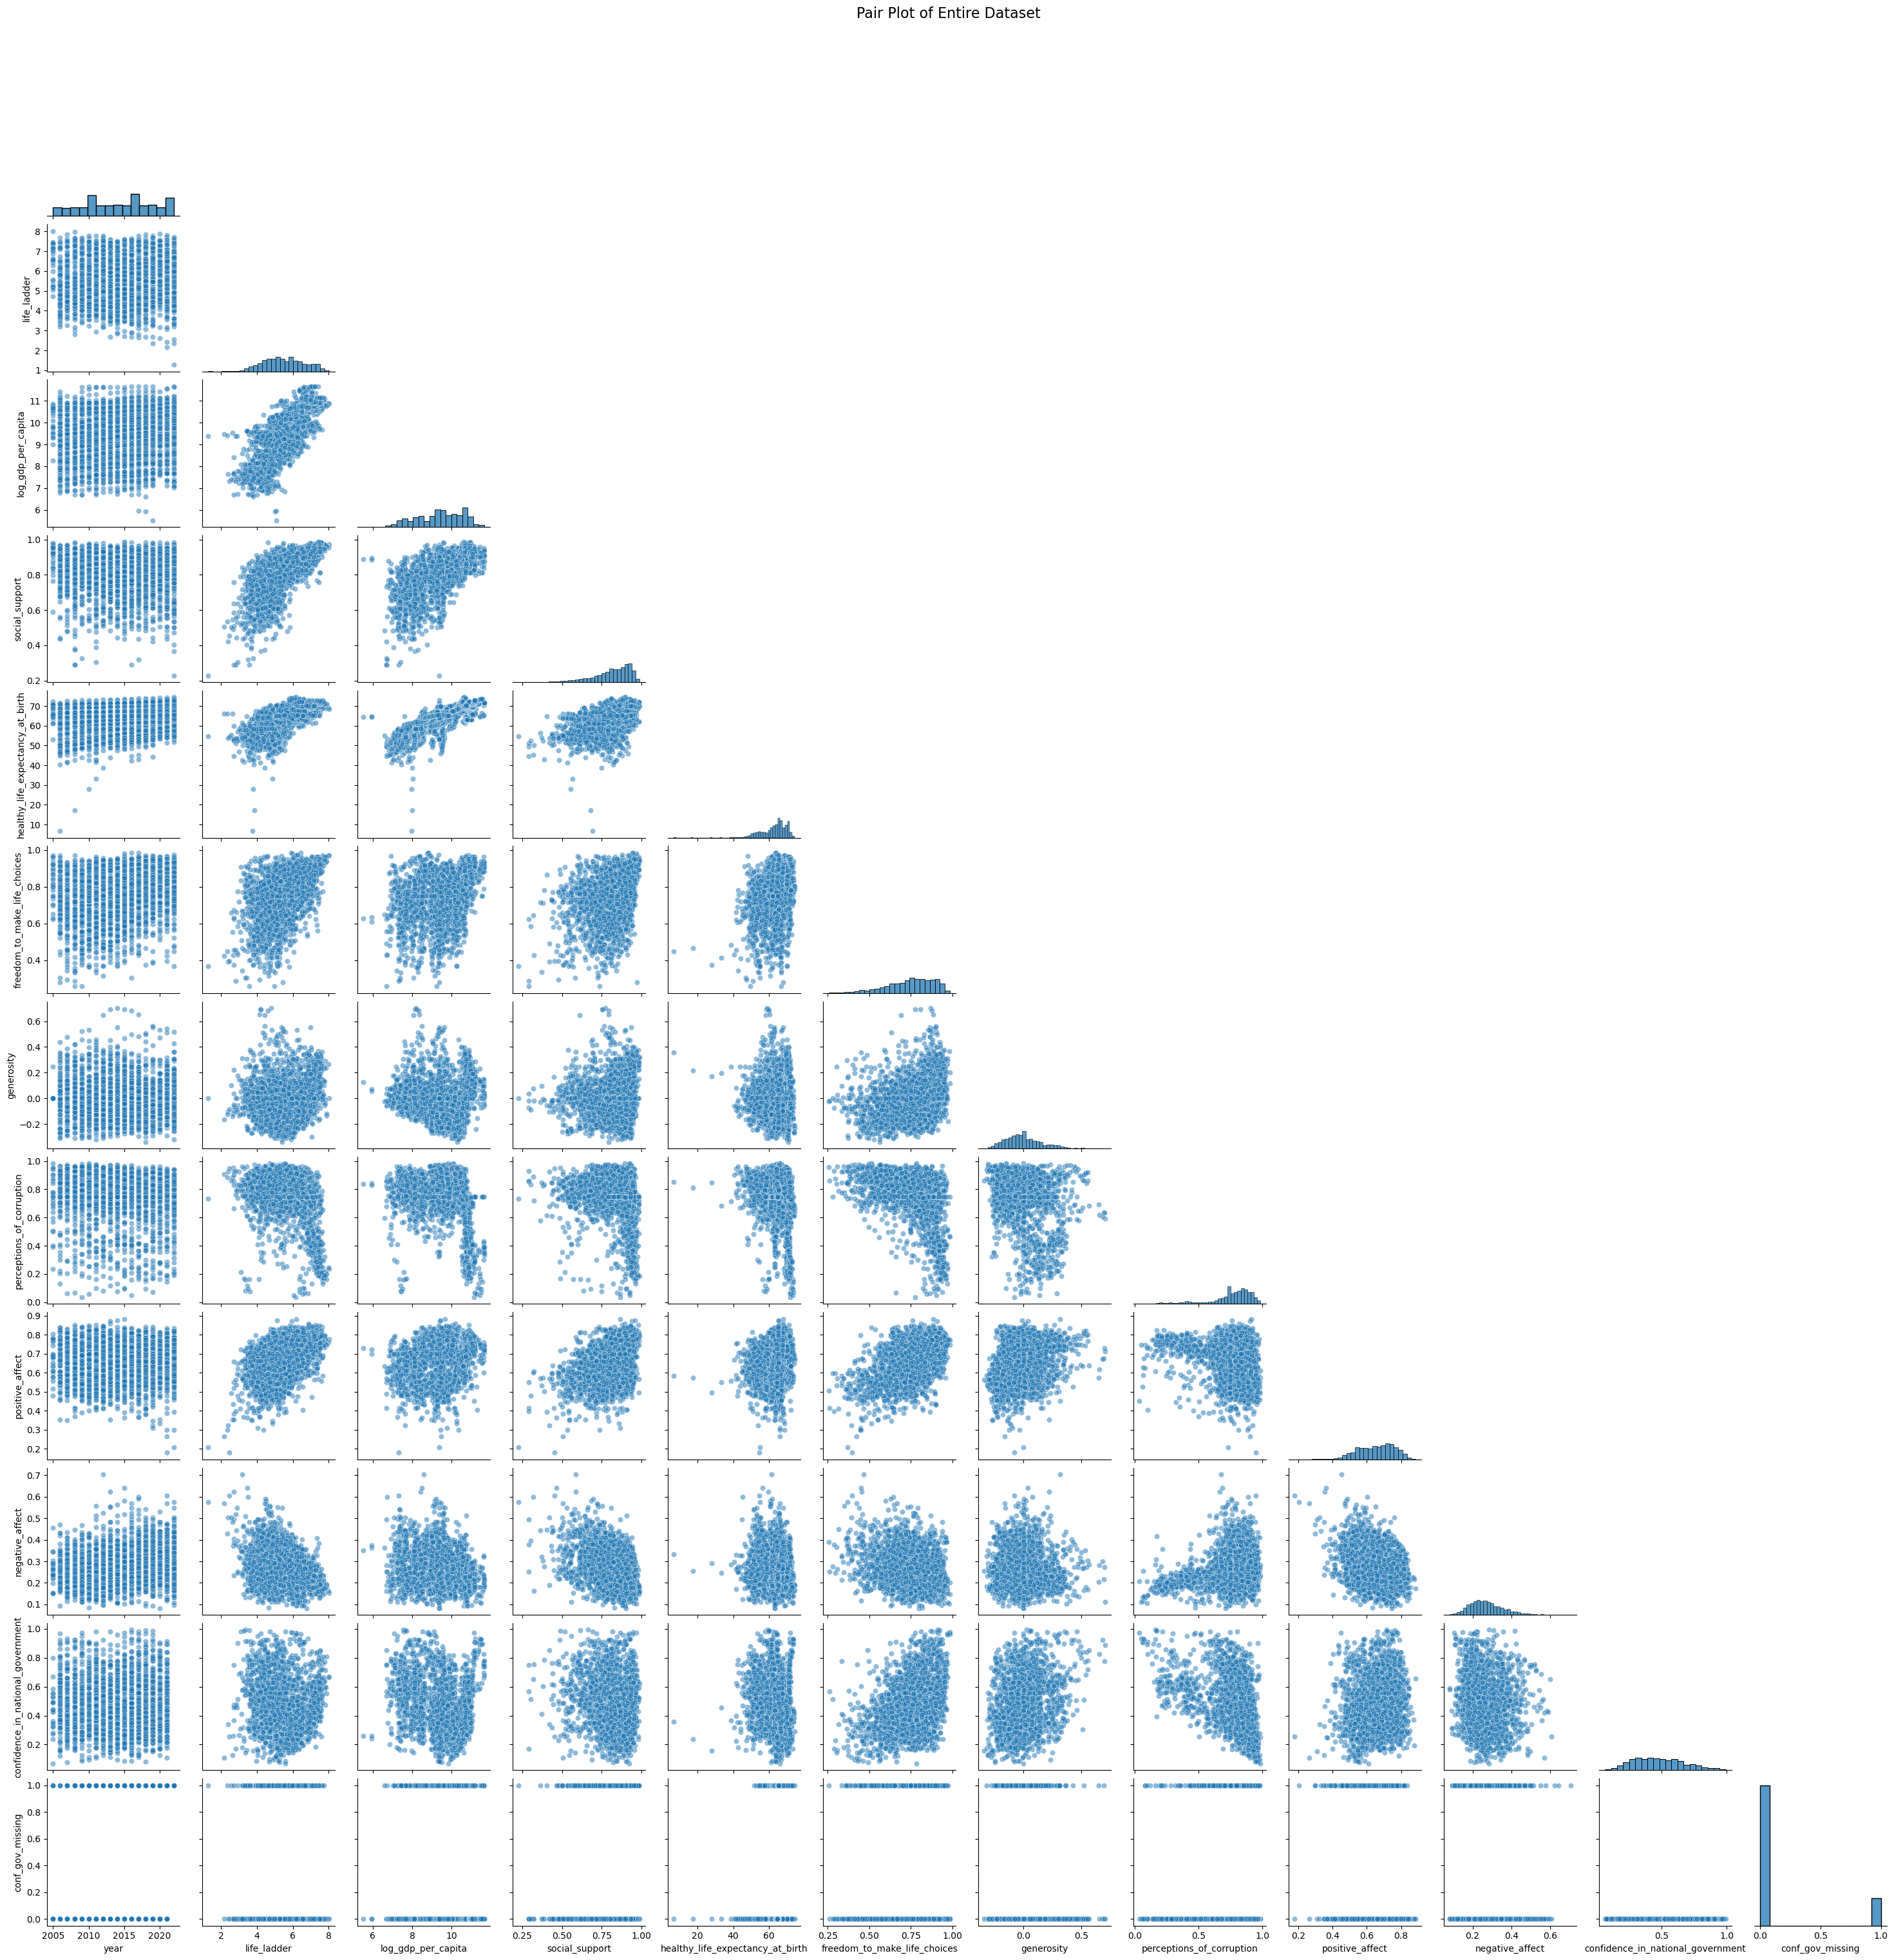

In [20]:
# Pair plot of the entire dataset (numeric vars)
pair_plot = sns.pairplot(numeric_df, diag_kind="hist", corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Entire Dataset", y=1.02, fontsize=16)
plt.show()


The pair plot displays all numeric variables, including `year`, `confidence_in_national_government`, and `conf_gov_missing`.

Distributions (diagonal):
- `life_ladder` clusters between 4–7, showing most countries score mid-range, with fewer very high or low scores.  
- `log_gdp_per_capita` is skewed to the right: many countries are lower income, while only a few have very high GDP.  
- `social_support`, `freedom_to_make_life_choices`, and `positive_affect` lean towards higher values, indicating many populations report strong social connections, freedom, and positive emotions.  
- `healthy_life_expectancy_at_birth` spreads from about 40 to 75 years, reflecting large global differences.  
- `negative_affect` and `perceptions_of_corruption` are more evenly spread.  
- `confidence_in_national_government` looks patchy due to missing data.  
- `conf_gov_missing` is a binary flag (0/1) rather than a continuous distribution, which confirms it’s mainly a technical helper column.

Relationships (off-diagonal):
- Strong positive associations appear between `life_ladder` and `GDP`, `social_support`, and `healthy_life_expectancy`.  
- Negative associations are visible between `life_ladder` and `perceptions_of_corruption` or `negative_affect`.  
- `year` shows no strong linear relationship with most variables, though it is useful for time-series analysis.  
- Some scatterplots reveal regional clustering (e.g., Western Europe vs. Sub-Saharan Africa), which motivates exploring regional comparisons.

Variables to Explore Further:
- `confidence_in_national_government`: due to missingness and uneven spread, this warrants special treatment (Step 7).  
- `generosity`: distribution appears unusual and may require deeper inspection.  
- `perceptions_of_corruption`: interesting outliers suggest it may vary strongly by region.

Conclusion:  
The pair plot reinforces earlier correlation findings and highlights variables with clear predictive power (GDP, social support, life expectancy, freedom), while also flagging special cases (government confidence, generosity, corruption) for deeper analysis in subsequent steps.


In [21]:
pair_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pair_plot.png'))

Create a Categorical Plot

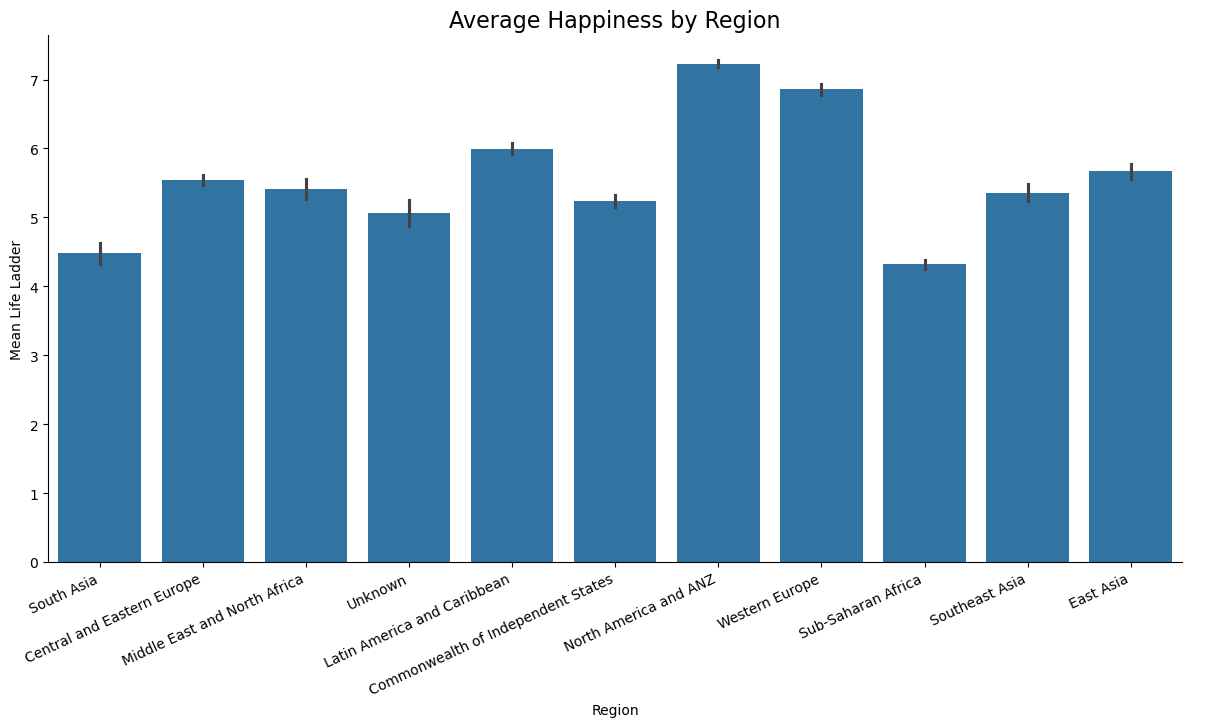

In [22]:
# Create catplot for average happiness per region
bar_average_happiness = sns.catplot(
    data=df,
    x="regional_indicator",
    y="life_ladder",
    kind="bar",
    height=6,
    aspect=2
)
plt.xticks(rotation=25, ha="right")
plt.title("Average Happiness by Region", fontsize=16)
plt.xlabel("Region"); plt.ylabel("Mean Life Ladder")
plt.show()


In [23]:
# export chart
bar_average_happiness.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_average_happiness.png'))

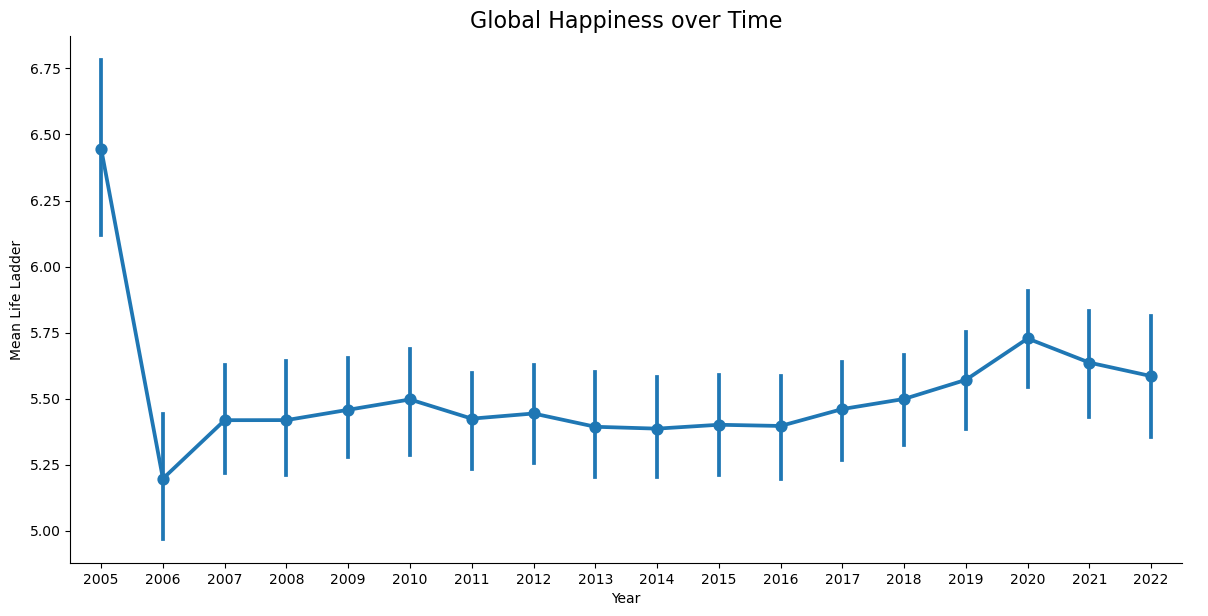

In [24]:
# Create chart for trends across years
happiness_over_time = sns.catplot(
    data=df,
    x="year",
    y="life_ladder",
    kind="point",
    height=6,
    aspect=2
)
plt.title("Global Happiness over Time", fontsize=16)
plt.xlabel("Year"); plt.ylabel("Mean Life Ladder")
plt.show()


In [25]:
# Export chart 
happiness_over_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_happiness_over_time.png'))

I used a categorical plot to compare average happiness scores, 'life_ladder', across categories.

- The bar plot shows that some regions (like Western Europe and North America) have higher average happiness than others (like Sub-Saharan Africa).  
- The point plot shows that global happiness has stayed fairly stable over time, with small rises and dips.  

This confirms that happiness differs by groups (regions, or years), and categorical plots help to visualise those differences clearly.


Creating a categorical variable that splits the 'life_ladder' column into categories

In [26]:
# Create happiness categories from life ladder
df["happiness_category"] = pd.cut(
    df["life_ladder"],
    bins=[0,4,6,8,10],
    labels=["Low","Medium","High","Very High"]
)


In [27]:
# Check distribution of categories
df["happiness_category"].value_counts()


happiness_category
Medium       1258
High          736
Low           204
Very High       1
Name: count, dtype: int64

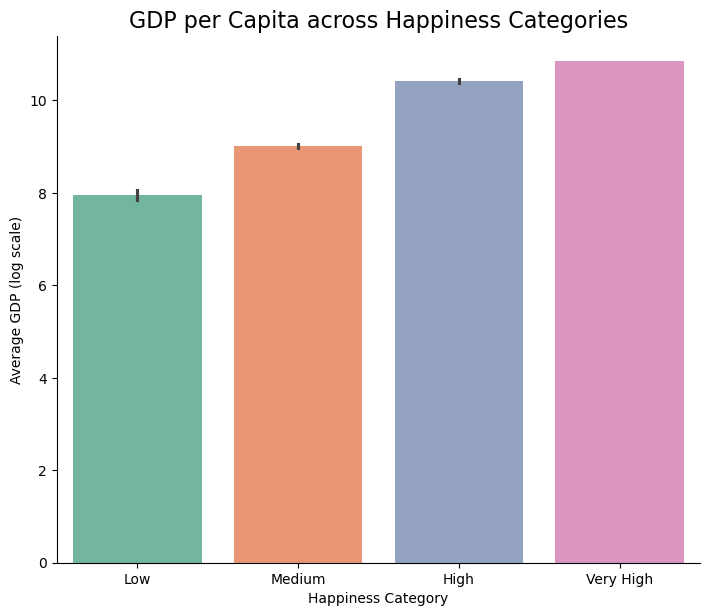

In [28]:
# Create bar chart with happiness categories
bar_happiness_cat = sns.catplot(
    data=df,
    x="happiness_category",
    y="log_gdp_per_capita",
    kind="bar",
    hue="happiness_category",  
    legend=False,               
    palette="Set2",             
    height=6,
    aspect=1.2
)
plt.title("GDP per Capita across Happiness Categories", fontsize=16)
plt.xlabel("Happiness Category")
plt.ylabel("Average GDP (log scale)")
plt.show()



In [29]:
# Export chart 
bar_happiness_cat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_happiness_gdp.png'))

## 4. Further Questions & Hypotheses

1. How has global happiness (life ladder score) changed from 2005 to 2022?
From the point plot over time, global happiness has been fairly stable overall, with small rises and dips. There is no strong upward or downward trend, but individual regions might show more movement than the global average.

2. Are some regions improving while others decline?
From the regional categorical plots, regions like Western Europe/North America tend to stay high and stable, while Sub-Saharan Africa is consistently lower. Some regions such as Latin America show more variation, suggesting regional differences are important.

3. Which regions consistently report higher or lower happiness scores?
Western Europe and North America have the highest average happiness, while Sub-Saharan Africa has the lowest. This is clear in the bar/box plots by region.

4. How does Ireland compare to the global average?
Ireland sits above the global average in most years, closer to the Western Europe region. This means Ireland is one of the higher-happiness countries overall.

5. Which variables (GDP, social support, life expectancy, freedom, generosity, corruption) are most strongly correlated with happiness?
The correlation heatmap and scatterplots show that GDP, social support, life expectancy, and freedom are strongly positively related to happiness. Corruption is negatively related. Generosity has a weaker and less consistent relationship.

6. Is there a relationship between confidence in national government and happiness?
There is a slight positive relationship, but it is not as strong as GDP or social support. Also, this variable has quite a lot of missing data, which limits the conclusions.

7. Does the “missingness” in this variable correspond to certain regions or country types?
Yes. From the missingness checks, some regions are more likely to have missing values for confidence in government, which probably reflects differences in survey coverage.


New Questions to Explore

Why do some regions (like Latin America) show higher happiness than expected given their GDP?

How do positive and negative affect scores compare across regions, and do they add more explanation beyond GDP and social support?

Are there any outlier countries that don’t follow the general patterns (e.g., low GDP but high happiness)?

Hypotheses Ideas

1. If a country has a higher GDP per capita, then its average happiness score ('life_ladder') will also be higher.

2. If people in a country report stronger social support, then the country will have higher happiness scores.

3. If a country has a higher healthy life expectancy at birth, then it will also have a higher happiness score.

4. If people in a country feel more freedom to make life choices, then their happiness score will be higher.

5. If perceptions of corruption are higher in a country, then its happiness score will be lower.

6. If people have more confidence in their national government, then average happiness in that country will be higher.


In [31]:
# Export Dataset
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness.csv'))